In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

signal=100
delta=0.5
flucLow=0.59
flucHigh=0.61


avAlphaVec=[]
avBetaVec=[]
avGammaVec=[]
for j in range(0,100):
    
    minAlpha=0
    minBeta=0
    minGamma=0
    minTimeScore=10000
    alpha=0.5
    beta=0.5
    gamma=0.5
    alphaVec=[alpha]
    betaVec=[beta]
    gammaVec=[gamma]
    oldTimeScore=10000
    for i in range(0,100000):
        p1Conc=0.5
        p2Conc=0.5
        p3Conc=0.5
        
        for k in range(0,10000):
            p1Conc=(1-alpha-beta)*p1Conc+signal
            p2Conc=(1-gamma)*p2Conc+ alpha*p1Conc
            p3ConcOld=p3Conc
            p3Conc=(1-delta)*p3Conc-gamma*p2Conc+beta*p1Conc
            if p3ConcOld == p3Conc and k>0:
                timeScore=k
                
                break
        #if timeScore> oldTimeScore:
        #    randi = np.random.rand()
        #    if randi <0.2:
        #        alpha=oldAlpha
        #        beta=oldBeta
        #        gamma=oldGamma
        #if timeScore< oldTimeScore:
        #    randi = np.random.rand()
        #    if randi <0.2:
        #        alpha=oldAlpha
        #        beta=oldBeta
        #        gamma=oldGamma
        if timeScore< minTimeScore and p3Conc >flucLow and p3Conc < flucHigh:
            #print(timeScore)
            minTimeScore = timeScore
            minAlpha=alpha
            minBeta=beta
            minGamma=gamma
            minp3=p3Conc
        #print(p3Conc)
        oldTimeScore=timeScore
        oldAlpha=alpha
        oldBeta=beta
        oldGamma=gamma   
        if p3Conc <0.6:
            rando=np.random.rand()
            if rando >0 and rando <= 0.33 and beta <0.99:
                beta=beta+0.01
            if rando > 0.33 and rando <= 0.66 and alpha>0.01:
                alpha=alpha-0.01
            if rando >0.66 and gamma> 0.01:
                gamma = gamma - 0.01
        if p3Conc >= 0.6:
            rando=np.random.rand()
            if rando >0 and rando <= 0.33 and beta>0.01:
                beta=beta-0.01
            if rando > 0.33 and rando <= 0.66 and alpha<0.99:
                alpha=alpha+0.01
            if rando >0.66 and gamma<0.99:
                gamma = gamma + 0.01
        alphaVec.append(alpha)
        betaVec.append(beta)
        gammaVec.append(gamma)
    #avAlphaVec.append(alphaVec[999])
    #avBetaVec.append(betaVec[999])
    #avGammaVec.append(gammaVec[999])
    #plt.plot(avAlphaVec,'r.')
    #plt.plot(avBetaVec,'b.')
    #plt.plot(avGammaVec,'g.')
    #plt.show()
    print("min",minTimeScore, minAlpha,minBeta,minGamma,minp3)

KeyboardInterrupt: 

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import gene_functions as gf
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout
from ipywidgets import interact, IntSlider

m = IntSlider(value=2, min=1, max=10)
@interact(m=m)

def compare_barabasi_albert_graph(m):
    fig, ax = plt.subplots()
    G_ba = nx.barabasi_albert_graph(n=20, m=m)
    x=[]
    y=[]
    for i in list(G_ba.nodes):
        x.append(i)
        y.append(G_ba.degree(i))
    ax.scatter(x, y, label="Barabasi-Albert Graph")



vertices=5
edgeProb=0.4
G=nx.erdos_renyi_graph(vertices,edgeProb,directed=True)
G.add_edge(0, 0)
duplicationGenes = [0,1,2]
G_dup=gf.duplicate_genes(G,duplicationGenes)


interactive(children=(IntSlider(value=2, description='m', max=10, min=1), Output()), _dom_classes=('widget-int…

In [2]:
n=5
m=5
qCon=0.5
qMod = 0.6
G=nx.DiGraph(nx.scale_free_graph(2))
G=gf.dmc_single_lineage(G,n,qCon,qMod)
G1,G2=gf.network_birth(G,m,m,qCon,qMod,iteration = n)
G=gf.label_conserver(G)
G1=gf.label_conserver(G1)
G2=gf.label_conserver(G2)

#print(len(list(G1.nodes)),len(list(G2.nodes)))
#nx.draw_circular(G,with_labels=True)
G1_orig=copy.deepcopy(G1)
G2_orig=copy.deepcopy(G2)
G_orig=copy.deepcopy(G)
#G1_forest=gf.duplication_forest(G1,n+m)
#G2_forest=gf.duplication_forest(G2,n+m)



In [3]:
G=gf.label_conserver(G)
G1=gf.label_conserver(G1)
G2=gf.label_conserver(G2)
#print(len(list(G1.nodes)),len(list(G2.nodes)))
#nx.draw_circular(G,with_labels=True)
G1_orig=copy.deepcopy(G1)
G2_orig=copy.deepcopy(G2)
G_orig=copy.deepcopy(G)

In [5]:
plt.figure(figsize=(15, 8))
pos=nx.circular_layout(G1_forest)
edge_labels = dict([((n1, n2), G1_forest[n1][n2]['weight'])
                    for n1, n2 in G1_forest.edges])

#nx.draw_circular(G1_forest,with_labels=True)
#print(nx.is_forest(G1_forest))
#gf.tree_distance_loop('0_4','0_1',G1_forest)
#gf.closest_neighbour_distance('1_4','1_1_4',G1_forest,G2_forest)
#g=Network(height=800,width=800)
#g.barnes_hut()
#g.from_nx(G1_forest)
#g.show("e.html")
labels={}
for node in G1_forest.nodes():
    if G1_forest.out_degree(node)==0:
        labels[node]=node
pos=graphviz_layout(G1_forest,prog="dot")
nx.draw_networkx_edge_labels(G1_forest, pos, edge_labels=edge_labels,font_size=20)
nx.draw(G1_forest,pos,with_labels=False)
nx.draw_networkx_labels(G1_forest,pos,labels,font_size=14)
plt.savefig("tree1.pdf")
plt.show()
#(0,0,2),(1,1,2)(0_1,0_1,2),(0_2,0,2),(2,2,2) 5-10/4=(20-10)/4=10/5 = 5/2 5/2/5=1/2=0.5

NameError: name 'G1_forest' is not defined

<Figure size 1080x576 with 0 Axes>

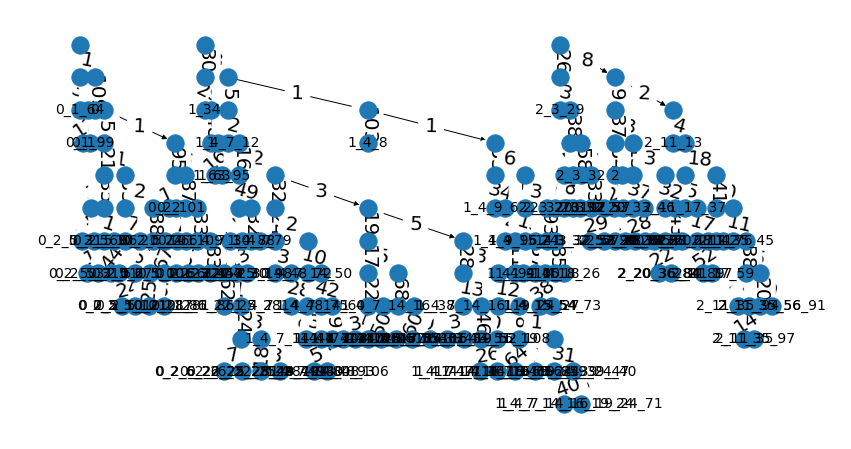

In [6]:
plt.figure(figsize=(15, 8))
pos=nx.circular_layout(G2_forest)
edge_labels = dict([((n1, n2), G2_forest[n1][n2]['weight'])
                    for n1, n2 in G2_forest.edges])

#print(nx.is_forest(G2_forest))
labels={}
for node in G2_forest.nodes():
    if G2_forest.out_degree(node)==0:
        labels[node]=node
pos=graphviz_layout(G2_forest,prog="dot")
nx.draw_networkx_edge_labels(G2_forest, pos, edge_labels=edge_labels,font_size=20)
nx.draw(G2_forest,pos,with_labels=False)
nx.draw_networkx_labels(G2_forest,pos,labels,font_size=14)
plt.savefig("tree2.pdf")
plt.show()

In [2]:
nx.draw_circular(G1,with_labels=True)
plt.savefig("g1original.pdf")

NameError: name 'nx' is not defined

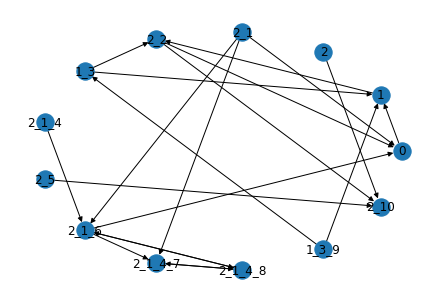

In [ ]:
nx.draw_circular(G2,with_labels=True)
plt.savefig("g2original.pdf")

EC: 0.38461538461538464
ICS: 0.45454545454545453
S3: 0.2631578947368421


NameError: name 'G1_forest' is not defined

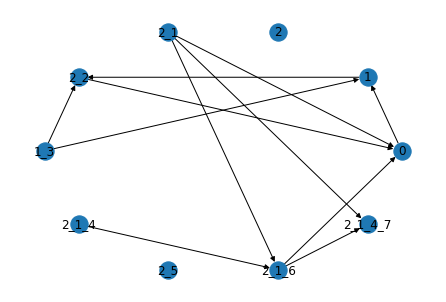

In [21]:
sourceEdges= len(list(G1.edges()))
#print(sourceEdges)
conservedEdge=0

for x in list(G1.nodes):
    for y in list(G2.nodes):
        if (x,y) in list(G1.edges) and (x,y) in list(G2.edges):
            conservedEdge=conservedEdge+1
#print(conservedEdge)
print("EC:",conservedEdge/sourceEdges)

G2_ind = nx.induced_subgraph(G2,list(G1.nodes))
nx.draw_circular(G2_ind,with_labels=True)
inducedEdges=len(list(G2_ind.edges))
print("ICS:",conservedEdge/inducedEdges)
print("S3:",conservedEdge/(sourceEdges+inducedEdges-conservedEdge))
originalNCScore=gf.original_networks_NC_score(G1,G2,G1_forest,G2_forest,n+m,m)
print("Original Modified NC SCore ",gf.original_networks_NC_score(G1,G2,G1_forest,G2_forest,n+m,m))
#print("New MEtric",2*conservedEdge/(sourceEdges+inducedEdges))

In [8]:


G=nx.convert_node_labels_to_integers(G_orig)
G1=nx.convert_node_labels_to_integers(G1_orig)
G2=nx.convert_node_labels_to_integers(G2_orig)
P1=gf.gene_family_partitioner(G1,orig_label=True)
P2=gf.gene_family_partitioner(G2,orig_label=True)
print(P1,P2)
alignVec,mapped=gf.NF_gene_family(G1,G2,P1,P2,32,0.8)
mapping1 = dict(alignVec)
mapping2=dict()
print(mapping1)
for i in list(G2.nodes):

    if i not in mapping1.values():
        mapping2[i]=str(i)+"_2"
    else:
        mapping2[i]=i
for i in list(G1.nodes):
    if i not in mapping1.keys():
        mapping1[i]=str(i)+"_1"

print(mapping1)
print(mapping2)
G1_mapped=nx.relabel_nodes(G1,mapping1)

G2_mapped=nx.relabel_nodes(G2,mapping2)
G2TrueLabel=dict()
G1TrueLabel=dict()
for i in list(G1_mapped.nodes):
    if isinstance(i,int):
    
        G1TrueLabel[i]=G1.nodes[i]['orig_label']
for i in list(G2.nodes):
    G2TrueLabel[i]=G2.nodes[i]['orig_label']
print("Alignment mapping:",alignVec)
print(G1TrueLabel)
print(G2TrueLabel)


P1=gf.gene_family_partitioner(G1_mapped,orig_label=True)
P2=gf.gene_family_partitioner(G2_mapped,orig_label=True)


{'0': [0, 3, 8, 9], '1': [1, 10], '2': [2, 4, 5, 6, 7, 11, 12]} {'0': [0, 3], '1': [1, 12], '2': [2, 4, 5, 6, 7, 8, 9, 10, 11]}
0 0
0 3
3 0
3 3
8 0
8 3
9 0
9 3
1 1
1 12
10 1
10 12
2 2
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
4 2
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
5 2
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
6 2
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
7 2
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
11 2
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
12 2
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
10 12 49.2
0 0
0 3
3 0
3 3
8 0
8 3
9 0
9 3
1 1
2 2
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
4 2
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
5 2
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
6 2
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
7 2
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
11 2
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
12 2
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
8 0 43.666666666666664
0 3
3 3
9 3
1 1
2 2
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
4 2
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
5 2
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
6 2
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
7 2
7 4
7 5
7 

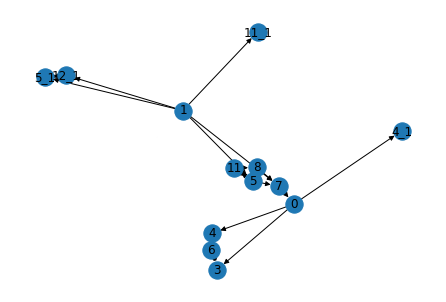

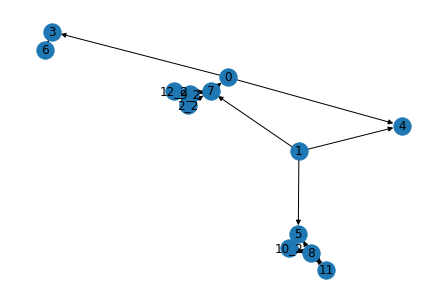

In [19]:
nx.draw(G1_mapped,with_labels=True)
plt.figure()
nx.draw(G2_mapped,with_labels=True)

In [15]:
G=nx.convert_node_labels_to_integers(G_orig)
G1=nx.convert_node_labels_to_integers(G1_orig)
G2=nx.convert_node_labels_to_integers(G2_orig)
alignVec,mapped,pairingDictParents,pairingDictChildren=gf.NF(G1,G2,32,0.8)
mapping = dict(alignVec)
#print(mapped)
G1_mapped=nx.induced_subgraph(G1,list(mapped))
G1_mapped=nx.relabel_nodes(G1_mapped,mapping)

print("Alignment mapping:",alignVec)
#print(G1_mapped.edges)
#print(G2.edges)


2.161111111111111
1.8453333333333335
1.3120000000000003
2.1333333333333337
3.666666666666667
0.9216000000000002
4.533333333333334
1.3511111111111114
1.7920000000000003
1.7920000000000003
1.706666666666667
0.9216000000000002
4.359999999999999
1.3120000000000003
2.6
1.4080000000000004
1.3866666666666667
1.0730666666666666
2.14
1.4826666666666668
1.6400000000000001
1.3333333333333335
1.7333333333333334
1.4400000000000002
2.64
1.3461333333333334
28.106666666666673
2.4533333333333336
32.75
2.611111111111111
0.7822222222222223
2.2
2.4000000000000004
1.88
1.2444444444444445
2.2666666666666666
1.9666666666666666
1.568888888888889
2.2933333333333334
1.3120000000000003
2.333333333333333
1.3226666666666669
1.6000000000000003
1.2096
1.9733333333333334
1.4400000000000002
1.8533333333333335
1.6
2.0
1.6
1.6400000000000001
1.4144
19.91466666666667
2.4000000000000004
43.166666666666664
1.8263888888888888
68.26666666666667
2.2
1.8666666666666667
18.400000000000002
33.333333333333336
2.9333333333333336
4

ValueError: not enough values to unpack (expected 4, got 2)

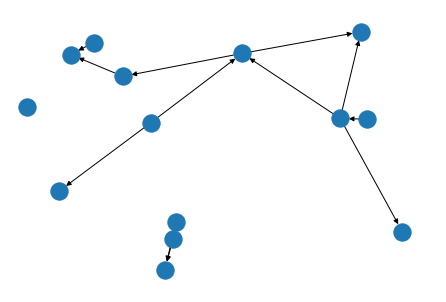

In [32]:
pos=nx.circular_layout(G2)
nx.draw(G1)
plt.savefig("Graph1unalignedmanytoone.pdf")

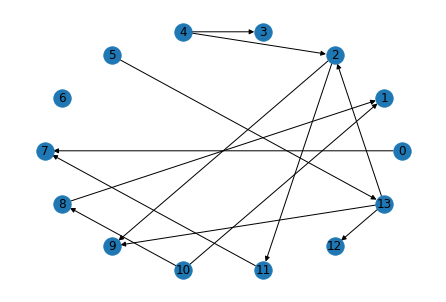

In [33]:
pos=nx.circular_layout(G2)
nx.draw(G1_mapped,with_labels=True,pos=pos)
plt.savefig("Graph1alignedmanytoone.pdf")


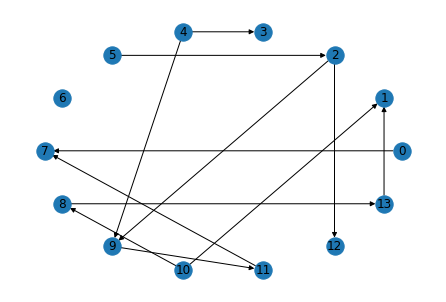

In [34]:

nx.draw(G2,with_labels=True,pos=pos)
plt.savefig("Graph2alignedmanytoone.pdf")


13
6
EC: 0.46153846153846156
ICS: 0.5
S3: 0.3157894736842105
11 1
Modified NC Score of Alignment 0.8571428571428571
Original Modified NC Score 1.0
Quality of Alignment Based off NC Score 0.8571428571428571


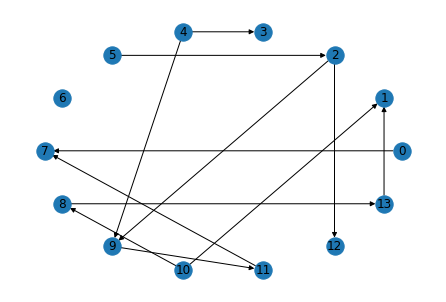

In [35]:
sourceEdges= len(list(G1_mapped.edges()))
print(sourceEdges)
conservedEdge=0
for x in range(0,max(len(list(G1_mapped.nodes)),len(list(G2.nodes)))):
    for y in range(0,max(len(list(G1_mapped.nodes)),len(list(G2.nodes)))):
        if (x,y) in list(G1_mapped.edges) and (x,y) in list(G2.edges):
            conservedEdge=conservedEdge+1
print(conservedEdge)
print("EC:",conservedEdge/sourceEdges)

G2_ind = nx.induced_subgraph(G2,list(G1_mapped.nodes))
inducedEdges=len(list(G2_ind.edges))
print("ICS:",conservedEdge/inducedEdges)
print("S3:",conservedEdge/(sourceEdges+inducedEdges-conservedEdge))
#print("New MEtric",2*conservedEdge/(sourceEdges+inducedEdges))
nx.draw(G2_ind,with_labels=True,pos=pos)
print(n+m,m)
modifiedNCScore=gf.NC_scorer(alignVec,mapped,G1,G2,G1_forest,G2_forest,DMCSteps=n+m,childDistance=m)
print("Modified NC Score of Alignment",gf.NC_scorer(alignVec,mapped,G1,G2,G1_forest,G2_forest,DMCSteps=n+m,childDistance=m))
print("Original Modified NC Score",originalNCScore)
print("Quality of Alignment Based off NC Score",1-(originalNCScore-modifiedNCScore)/originalNCScore)

[13, 1, 7, 10, 8, 2, 4, 11, 0, 3, 5, 12, 9]


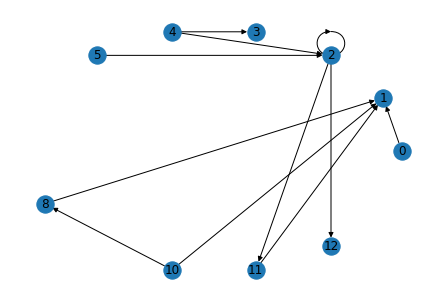

In [36]:

alignVec,mapped=gf.NF_many_to_one(G1,G,32,0.8)
print(mapped)
G1=nx.induced_subgraph(G1,list(mapped))
mapping = dict(alignVec)
G1=nx.relabel_nodes(G1,mapping)
nx.draw(G1,with_labels=True,pos=pos)

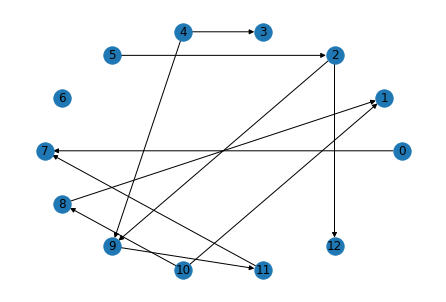

In [37]:
nx.draw(G,with_labels=True,pos=pos)

In [38]:
def node_match(a,b):
    print(a,b)
    if a==b:
        return True
    else:
        return False
gf.graph_edit_distance(G1,G2,node_match)

AttributeError: module 'gene_functions' has no attribute 'graph_edit_distance'

In [22]:
maxQuality=0
for a in range(-50,50):
    for b in np.arange(-20,20,0.2):
        G=nx.convert_node_labels_to_integers(G_orig)
        G1=nx.convert_node_labels_to_integers(G1_orig)
        G2=nx.convert_node_labels_to_integers(G2_orig)
        alignVec,mapped=gf.NF_many_to_one(G1,G2,a,b)
        mapping = dict(alignVec)

        G1_mapped=nx.induced_subgraph(G1,list(mapped))
        G1_mapped=nx.relabel_nodes(G1_mapped,mapping)
        modifiedNCScore=gf.NC_scorer(alignVec,mapped,G1,G2,G1_forest,G2_forest,DMCSteps=n+m,childDistance=m)
        quality=1-(originalNCScore-modifiedNCScore)/originalNCScore
        #print("Modified NC Score of Alignment",modifiedNCScore)
        #print("Original Modified NC Score",originalNCScore)
        #print("Quality of Alignment Based off NC Score",1-(originalNCScore-modifiedNCScore)/originalNCScore)
        #print("Alignment mapping:",alignVec)
        print(a,b,quality)
        if quality >maxQuality:
            maxQuality=quality
            maxA=a
            maxB=b
print(maxA,maxB,maxQuality)


-50 -20.0 0.19999999999999996
-50 -19.8 0.19999999999999996
-50 -19.6 0.19999999999999996
-50 -19.400000000000002 0.19999999999999996
-50 -19.200000000000003 0.19999999999999996
-50 -19.000000000000004 0.19999999999999996
-50 -18.800000000000004 0.19999999999999996
-50 -18.600000000000005 0.19999999999999996
-50 -18.400000000000006 0.19999999999999996
-50 -18.200000000000006 0.19999999999999996
-50 -18.000000000000007 0.19999999999999996
-50 -17.800000000000008 0.19999999999999996
-50 -17.60000000000001 0.19999999999999996
-50 -17.40000000000001 0.19999999999999996
-50 -17.20000000000001 0.19999999999999996
-50 -17.00000000000001 0.19999999999999996
-50 -16.80000000000001 0.19999999999999996
-50 -16.600000000000012 0.19999999999999996
-50 -16.400000000000013 0.19999999999999996
-50 -16.200000000000014 0.19999999999999996
-50 -16.000000000000014 0.19999999999999996
-50 -15.800000000000015 0.19999999999999996
-50 -15.600000000000016 0.19999999999999996
-50 -15.400000000000016 0.199999999

In [144]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import gene_functions as gf
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout

n=100
m=5
qCon=0.5
qMod=0.2
G=nx.path_graph(3)
G=nx.DiGraph(G)
G.remove_edge(0,1)
G.remove_edge(2,1)
iterations=100
network_order_dmc=[]
network_order_nf=[]
S3_nf_vec=[]
S3_nf_vec_ave=[]

S3_dmc_vec=[]
S3_dmc_vec_ave=[]

network_order_dmc_vec_ave=[]
network_order_nf_vec_ave=[]
EC_nf_vec_ave=[]
ICS_nf_vec_ave=[]
    
EC_dmc_vec_ave=[]
ICS_dmc_vec_ave=[]

qMod_vec=[i for i in np.arange(0,1.001,0.01)]
G_anc=gf.dmc_single_lineage(G,n,qCon,qMod,iteration=0)
G_anc=gf.label_conserver(G_anc)
G1,G2=gf.network_birth(G_anc,m,m,qCon,qMod,iteration=n)
G1=gf.label_conserver(G1)
G2=gf.label_conserver(G2)
        

In [10]:

G_dmc_anc=gf.dmc_anc_rec(G1,G2,qMod,qCon)
for j in list(G_dmc_anc.nodes()):
    if (G_dmc_anc.out_degree(j)==0 and G_dmc_anc.in_degree(j)==0):
        G_dmc_anc.remove_node(j)
    elif G_dmc_anc.out_degree(j)==1 and G_dmc_anc.in_degree(j)==1 and (j,j) in list(G_dmc_anc.edges):
        G_dmc_anc.remove_node(j)
sourceEdges= len(list(G_dmc_anc.edges()))
targetEdges=len(list(G_anc.edges()))
conservedEdge=0
extraEdge=0
for x in list(G_anc.nodes):
    for y in list(G_anc.nodes):
        if (x,y) in list(G_dmc_anc.edges) and (x,y) in list(G_anc.edges):
            conservedEdge=conservedEdge+1
        elif (x,y) in list(G_dmc_anc.edges):
            extraEdge=extraEdge+1
if sourceEdges==0:
    EC_dmc=0
else:
    EC_dmc=0.5*(conservedEdge/sourceEdges+conservedEdge/targetEdges)

G2_ind = nx.induced_subgraph(G_anc,list(G_dmc_anc.nodes))
        
        
print(extraEdge,conservedEdge)
#overFlowEdges_dmc=(extraEdge-conservedEdge)/extraEdge
inducedEdges=len(list(G2_ind.edges))
        
if inducedEdges==0:
    ICS_dmc=0
else:
    ICS_dmc=conservedEdge/inducedEdges
if sourceEdges+inducedEdges-conservedEdge==0:
    S3_dmc=0
else:
    S3_dmc=conservedEdge/(sourceEdges+inducedEdges-conservedEdge)
        
        

0 1132


In [11]:
G1_orig=copy.deepcopy(G1)
G2_orig=copy.deepcopy(G2)

G1_labelless=nx.convert_node_labels_to_integers(G1_orig)
G2_labelless=nx.convert_node_labels_to_integers(G2_orig)
alignVec,mapped=gf.NF_alt(G1_labelless,G2_labelless,32,0.8)
mapping = dict(alignVec)

G1_mapped=nx.induced_subgraph(G1_labelless,list(mapped))
G1_mapped=nx.relabel_nodes(G1_mapped,mapping)

print("Alignment mapping:",alignVec)

G_intersect=nx.intersection(G1_mapped,G2_labelless)

for j in list(G_intersect.nodes()):
    if (G_intersect.out_degree(j)==0 and G_intersect.in_degree(j)==0):
        G_intersect.remove_node(j)
    elif G_intersect.out_degree(j)==1 and G_intersect.in_degree(j)==1 and (j,j) in list(G_intersect.edges):
        G_intersect.remove_node(j)

mapping=dict()
for i in list(G_intersect.nodes):
    mapping[i]=G_intersect.nodes[i]['orig_label']
G_nf_anc=nx.relabel_nodes(G_intersect,mapping)
        
        

sourceEdges= len(list(G_nf_anc.edges()))
targetEdges=len(list(G_anc.edges()))
conservedEdge=0
extraEdge=0
for x in list(G_anc.nodes):
    for y in list(G_anc.nodes):
        if (x,y) in list(G_nf_anc.edges) and (x,y) in list(G_anc.edges):
            conservedEdge=conservedEdge+1
        elif (x,y) in list(G_nf_anc.edges):
            extraEdge=extraEdge+1
if sourceEdges==0:
    EC_nf=0
else:
    EC_nf=0.5*(conservedEdge/sourceEdges+conservedEdge/targetEdges)
        
G2_ind = nx.induced_subgraph(G_anc,list(G_nf_anc.nodes))
        
        
#overFlowEdges_nf=(extraEdge-conservedEdge)/extraEdge
inducedEdges=len(list(G2_ind.edges))
print(extraEdge,conservedEdge)
        
if inducedEdges==0:
    ICS_nf=0
else:
    ICS_nf=conservedEdge/inducedEdges
if sourceEdges+inducedEdges-conservedEdge==0:
    S3_nf=0
else:
    S3_nf=conservedEdge/(sourceEdges+inducedEdges-conservedEdge)
    





Alignment mapping: [(62, 62), (15, 15), (97, 97), (17, 17), (48, 48), (102, 102), (33, 33), (49, 49), (40, 40), (75, 75), (90, 90), (54, 54), (66, 66), (28, 28), (65, 65), (85, 85), (101, 101), (77, 77), (58, 58), (22, 22), (82, 82), (20, 20), (36, 36), (81, 81), (32, 32), (34, 34), (5, 5), (11, 11), (72, 72), (78, 78), (37, 37), (10, 10), (106, 60), (44, 44), (100, 43), (26, 26), (68, 68), (6, 92), (45, 14), (18, 18), (43, 12), (63, 63), (1, 1), (47, 107), (12, 100), (31, 31), (93, 93), (70, 70), (73, 73), (87, 87), (51, 51), (7, 7), (89, 89), (88, 88), (46, 46), (57, 57), (30, 30), (79, 79), (13, 13), (86, 69), (55, 55), (21, 21), (4, 39), (60, 56), (91, 19), (27, 27), (50, 50), (84, 84), (71, 71), (95, 95), (96, 45), (74, 74), (3, 3), (2, 41), (59, 59), (39, 80), (99, 23), (42, 42), (41, 35), (98, 98), (19, 64), (29, 29), (80, 76), (53, 8), (23, 91), (69, 96), (94, 4), (16, 16), (103, 94), (14, 106), (105, 104), (38, 47), (8, 61), (92, 6), (67, 2), (24, 24), (76, 53), (64, 99), (52,

In [39]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import gene_functions as gf
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout

n=20
m=5
qCon=0.5
qMod = 0.5
G=nx.DiGraph(nx.scale_free_graph(3))

G_anc=gf.dmc_single_lineage(G,n,qCon,qMod,iteration=0)
G1,G2=gf.network_birth(G_anc,m,m,qCon,qMod,iteration=n)



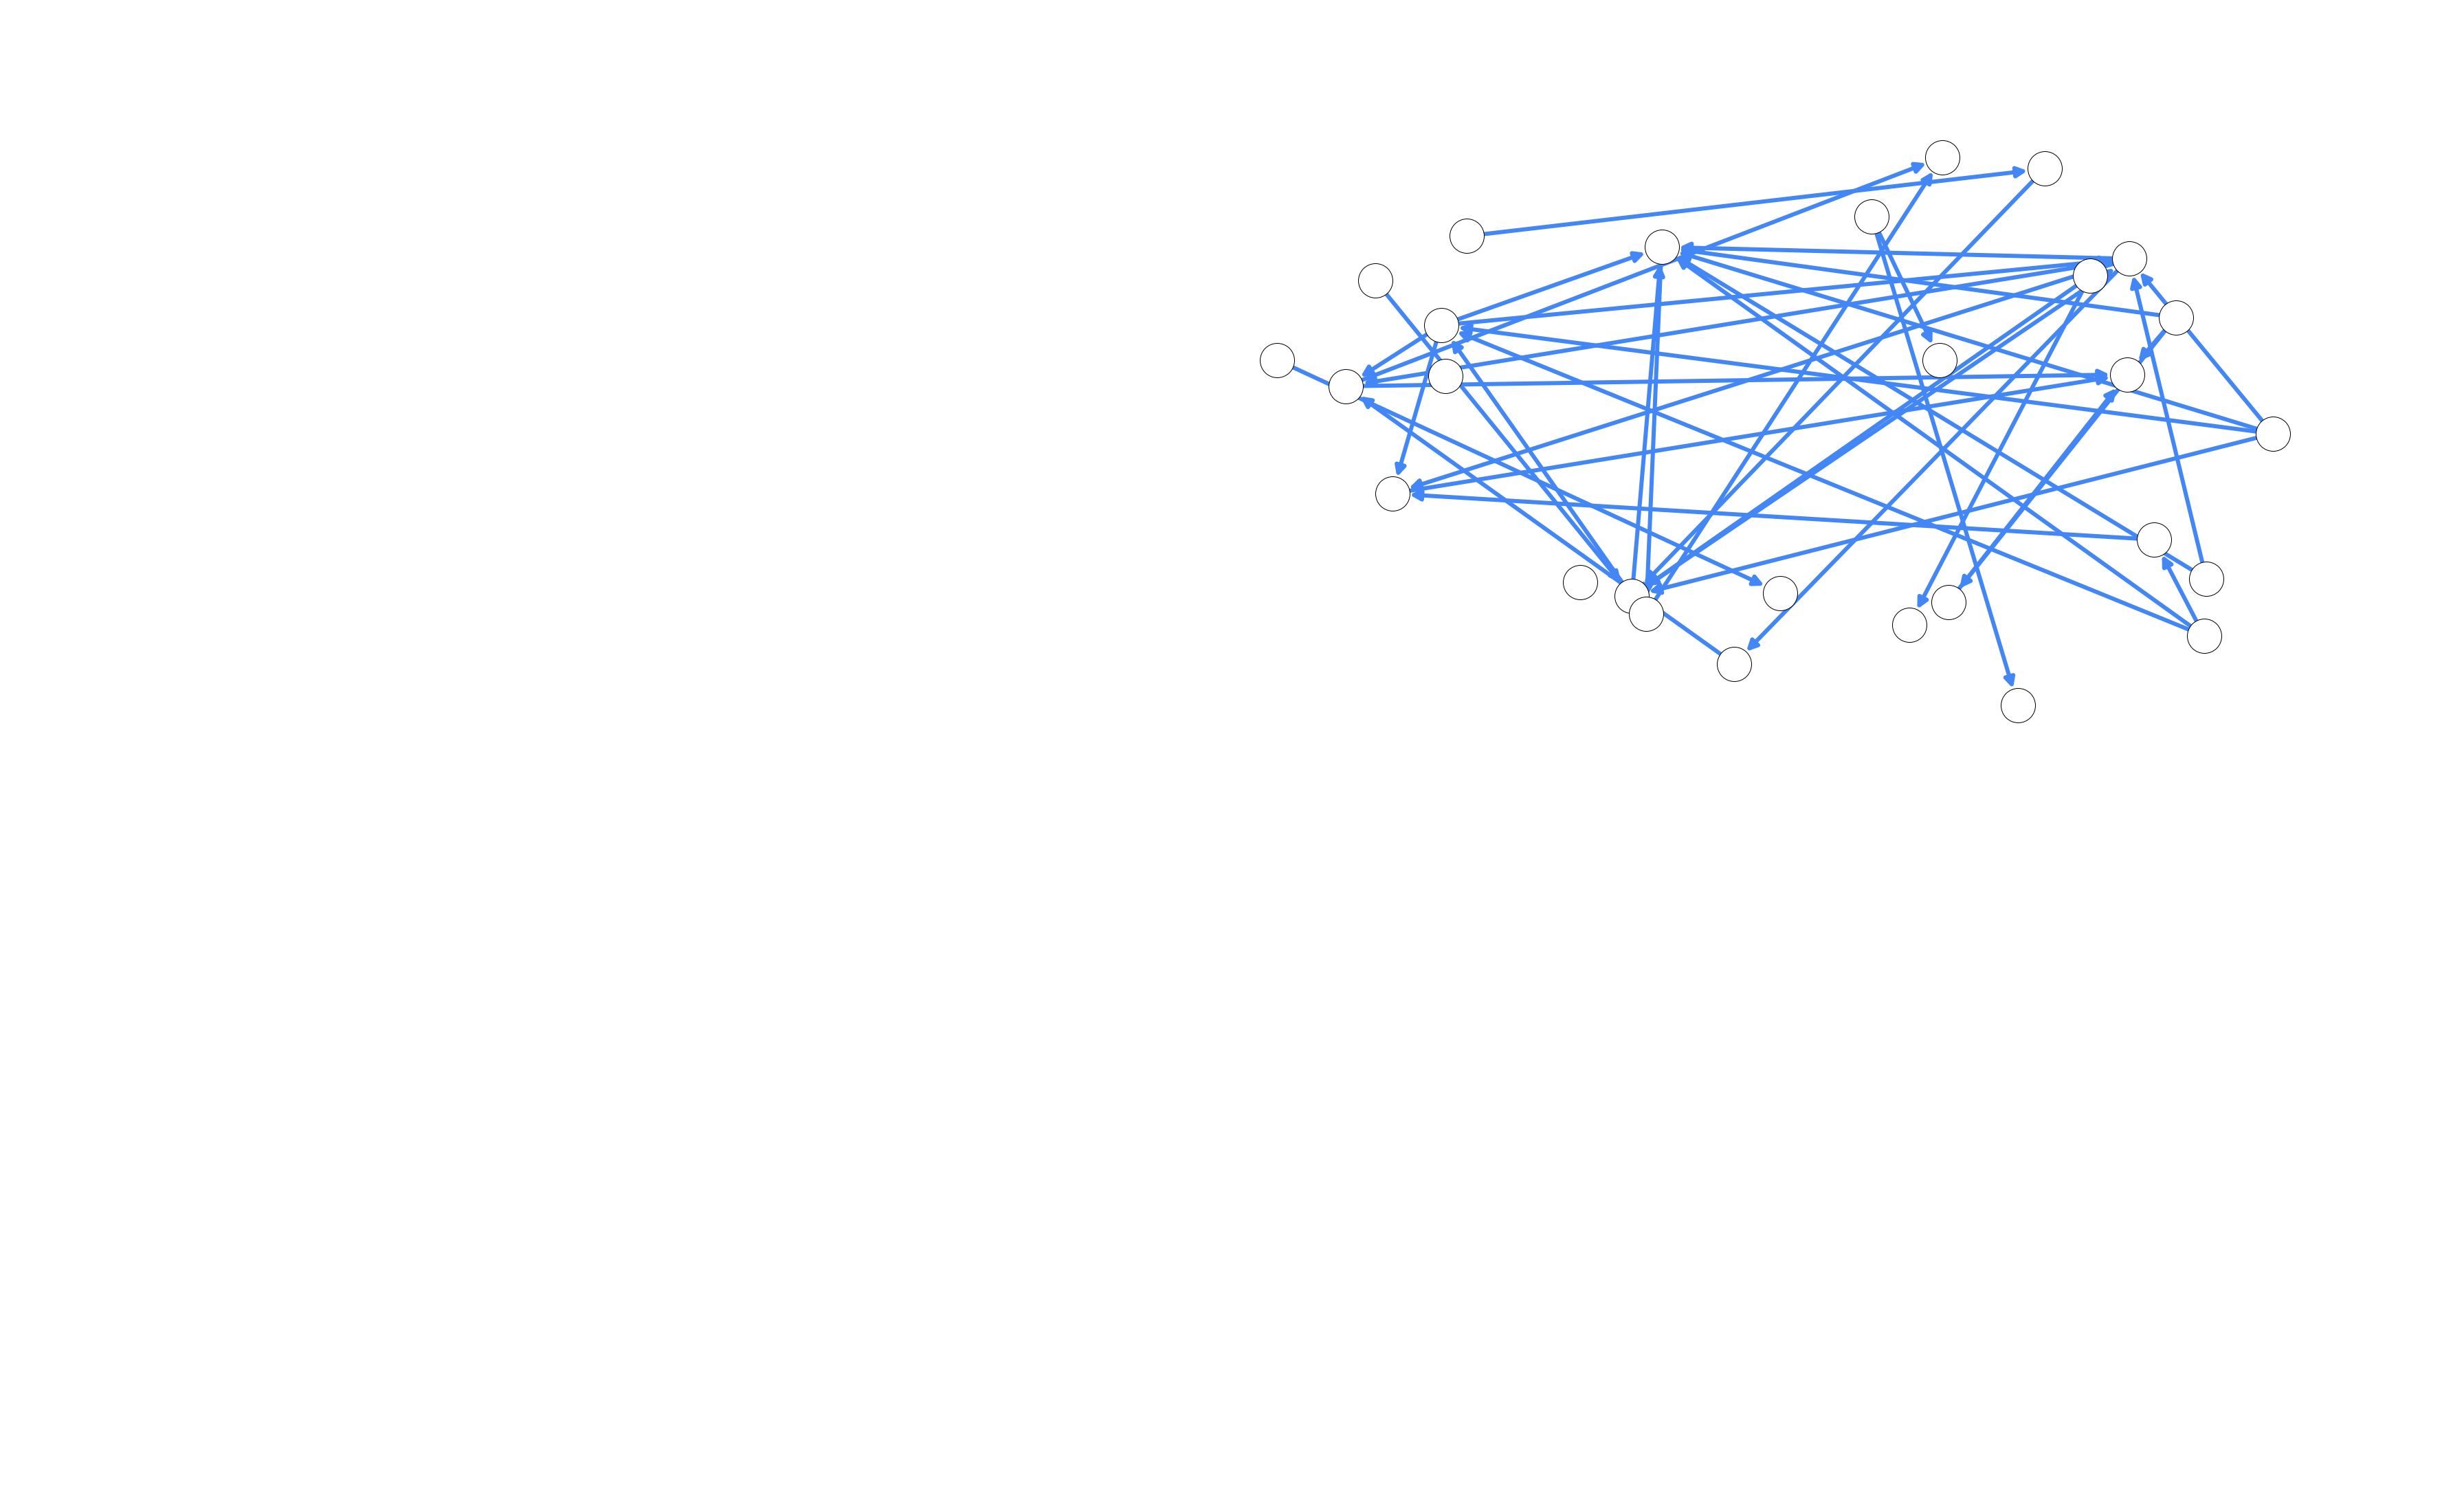

In [81]:
#G=nx.DiGraph(nx.scale_free_graph(3))
G=G1
G_dup=G
#print(G_dup.edges)
pos=nx.random_layout(G_dup)
for e in G.edges:
    
    G[e[0]][e[1]]['color']='#4287f5'
    
for e in G_dup.edges:
    if e[0]=='1\'':
        G_dup[e[0]][e[1]]['color']='#f54842'
    elif e[1] =='1\'':
        G_dup[e[0]][e[1]]['color']='#f54842'
    else:
        G_dup[e[0]][e[1]]['color']='#4287f5'
plt.figure(figsize=(64,40))
edge_color_list = [G[e[0]][e[1]]['color'] for e in G.edges() ]
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.2)  
  
#nx.draw(G,pos,with_labels=True,node_color='#FFFFFF',edge_color=edge_color_list,node_size=700,width=1.5,font_size=13)
nx.draw_networkx_edges(G, pos=pos,width=6,edge_color=edge_color_list,node_size=2500,arrowsize=30)
nx.draw_networkx_nodes(G,pos,node_color='#FFFFFF',node_size=2500,edgecolors="#000000",linewidths=1)
#nx.draw_networkx_labels(G,pos,font_size=30)
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("#000000") 
edge_color_list = [G_dup[e[0]][e[1]]['color'] for e in G_dup.edges() ]
plt.axis('off')
plt.savefig("j.png",transparent=True)

In [ ]:
print(G_dup.edges)
pos=nx.spring_layout(G_dup)
for e in G.edges:
    
    G[e[0]][e[1]]['color']='#4287f5'
    
for e in G_dup.edges:
    if e[0]=='1\'':
        G_dup[e[0]][e[1]]['color']='#f54842'
    elif e[1] =='1\'':
        G_dup[e[0]][e[1]]['color']='#f54842'
    else:
        G_dup[e[0]][e[1]]['color']='#4287f5'
plt.figure(figsize=(16,10))
edge_color_list = [G[e[0]][e[1]]['color'] for e in G.edges() ]
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1)  
  
#nx.draw(G,pos,with_labels=True,node_color='#FFFFFF',edge_color=edge_color_list,node_size=700,width=1.5,font_size=13)
nx.draw_networkx_edges(G, pos=pos,width=6,edge_color=edge_color_list,node_size=4000)
nx.draw_networkx_nodes(G,pos,node_color='#FFFFFF',node_size=4000,edgecolors="#000000")
nx.draw_networkx_labels(G,pos,font_size=30)
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("#000000") 
edge_color_list = [G_dup[e[0]][e[1]]['color'] for e in G_dup.edges() ]
plt.axis('off')
plt.savefig("1.png",transparent=True)

In [3]:
#G_dup=gf.duplicate_genes(G,[1],1)
#G_dup=nx.relabel_nodes(G_dup,{'1_1':'1\''})



[(0, 1), (0, 2), (0, 3), (0, 0), (0, "1'"), (1, 2), (2, 0), (4, 1), (4, "1'"), ("1'", 2)]


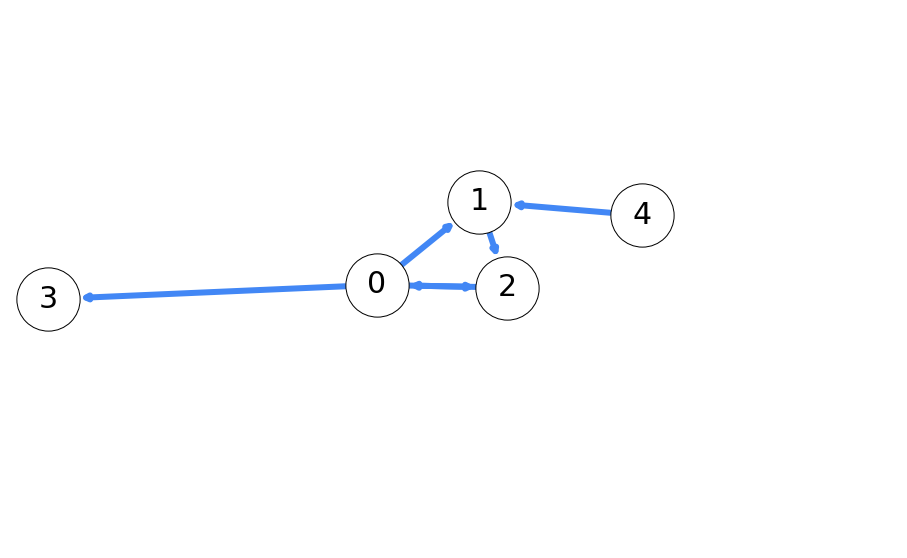

In [4]:
pos=nx.spring_layout(G_dup)
for e in G.edges:
    
    G[e[0]][e[1]]['color']='#4287f5'
    
for e in G_dup.edges:
    if e[0]=='1\'':
        G_dup[e[0]][e[1]]['color']='#f54842'
    elif e[1] =='1\'':
        G_dup[e[0]][e[1]]['color']='#f54842'
    else:
        G_dup[e[0]][e[1]]['color']='#4287f5'
plt.figure(figsize=(16,10))
edge_color_list = [G[e[0]][e[1]]['color'] for e in G.edges() ]
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1)  
  
#nx.draw(G,pos,with_labels=True,node_color='#FFFFFF',edge_color=edge_color_list,node_size=700,width=1.5,font_size=13)
nx.draw_networkx_edges(G, pos=pos,width=6,edge_color=edge_color_list,node_size=4000)
nx.draw_networkx_nodes(G,pos,node_color='#FFFFFF',node_size=4000,edgecolors="#000000")
nx.draw_networkx_labels(G,pos,font_size=30)
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("#000000") 
edge_color_list = [G_dup[e[0]][e[1]]['color'] for e in G_dup.edges() ]
plt.axis('off')
plt.savefig("1.png",transparent=True)

['#4287f5', '#4287f5', '#4287f5', '#f54842', '#4287f5', '#4287f5', '#4287f5']


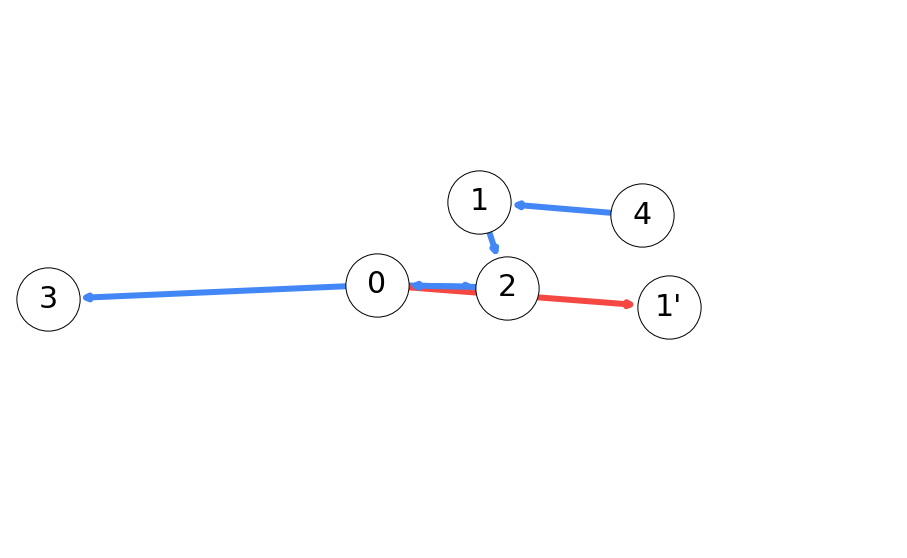

In [7]:
plt.figure(figsize=(16,10))

plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1)  
  
G_dupdel=copy.deepcopy(G_dup)
G_dupdel.remove_edges_from([(0,1),(4,'1\''),('1\'',2)])
for e in G_dupdel.edges:
    if e[0]=='1\'':
        G_dupdel[e[0]][e[1]]['color']='#f54842'
    elif e[1] =='1\'':
        G_dupdel[e[0]][e[1]]['color']='#f54842'
    else:
        G_dupdel[e[0]][e[1]]['color']='#4287f5'
edge_color_list = [G_dupdel[e[0]][e[1]]['color'] for e in G_dupdel.edges() ]
collection = nx.draw_networkx_edges(G_dupdel, pos=pos,width=6,edge_color=edge_color_list,node_size=4000)
#for i,patch in enumerate(collection):
#    if i==7 or i==0 or i==8:
#        patch.set_linestyle(':')
#        patch.set_linewidth(6)

nx.draw_networkx_nodes(G_dup,pos,node_color='#FFFFFF',node_size=4000,edgecolors="#000000")
nx.draw_networkx_labels(G_dup,pos,font_size=30)
print(edge_color_list)
#ax = plt.gca() # to get the current axis
#ax.collections[0].set_edgecolor("#000000") 
plt.axis('off')
plt.savefig("4.png",transparent=True)

In [84]:
nt = Network('500px', '500px',directed=True)
nt.show_buttons()
nt.from_nx(G)
nt.show('nx.html')

In [162]:
nt = Network('500px', '500px',directed=True)

nt.from_nx(G_dup)
nt.show_buttons()
nt.show('nx.html')


In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import gene_functions as gf
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout

import json as js
f = open('sorghum.json',)
data=js.load(f)
#data={"nodes": [{"data": {"id": "a", "label": "Gene1"}},{"data": {"id": "b", "label": "Gene2"}},{"data": {"id": "c", "label": "Gene3"}},{"data": {"id": "d", "label": "Gene4"}},{"data": {"id": "e", "label": "Gene5"}},{"data": {"id": "f", "label": "Gene6"}}],"edges": [{"data": {"id": "ab","source": "a","target": "b"}},{"data": {"id": "cd","source": "c","target": "d"}},{"data": {"id": "ef","source": "e","target": "f"}},{"data": {"id": "ac","source": "a","target": "d"}},{"data": {"id": "be","source": "b","target": "e"}}]        }
#print(data)

G_sorg=gf.cytoscape_graph(data,name="l")
print(G_sorg.nodes['8387']['l'])
print(G_sorg.edges)
print(G_sorg.nodes)
G=nx.Graph()
for e in G_sorg.edges():
    G.add_edge(G_sorg.nodes[e[0]]['l'],G_sorg.nodes[e[1]]['l'])


nt = Network('1000px', '1000px',directed=False)

nt.from_nx(G)
nt.show_buttons()
nt.show('nx.html')



FileNotFoundError: [Errno 2] No such file or directory: 'sorghum.json'

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import gene_functions as gf
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout

import json as js
#f = open('sorghum.json',)
#data=js.load(f)
#data={"nodes": [{"data": {"id": "a", "label": "Gene1"}},{"data": {"id": "b", "label": "Gene2"}},{"data": {"id": "c", "label": "Gene3"}},{"data": {"id": "d", "label": "Gene4"}},{"data": {"id": "e", "label": "Gene5"}},{"data": {"id": "f", "label": "Gene6"}}],"edges": [{"data": {"id": "ab","source": "a","target": "b"}},{"data": {"id": "cd","source": "c","target": "d"}},{"data": {"id": "ef","source": "e","target": "f"}},{"data": {"id": "ac","source": "a","target": "d"}},{"data": {"id": "be","source": "b","target": "e"}}]        }
#print(data)

G_coli=nx.read_edgelist("E_coli_GRN\E_coli_GRN_edges_only.txt",create_using=nx.DiGraph())

#G=nx.Graph()
#for e in G_sorg.edges():
#    G.add_edge(G_sorg.nodes[e[0]]['l'],G_sorg.nodes[e[1]]['l'])


nt = Network('1000px', '1000px',directed=True)

nt.from_nx(G_coli)
nt.show_buttons()
nt.show('nx.html')



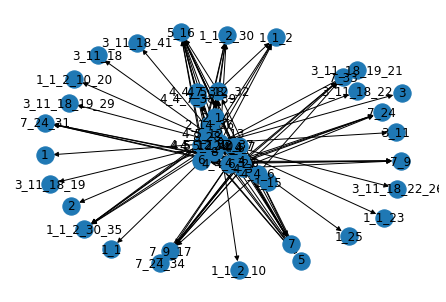

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import gene_functions as gf
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout

G=gf.GRN_seed_graph_ped_pea(steps=41,r=0.1,q=0.4)
nx.draw(G,with_labels=True)
nt = Network('1000px', '1000px',directed=True)

nt.from_nx(G)
nt.show_buttons()
nt.show('nx.html')

In [2]:
ancestor=G

50


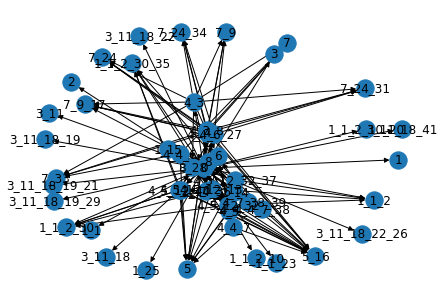

In [15]:
import numpy as np
import networkx as nx
from Genetc import gene_functions as gf
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import copy as copy


print(len(ancestor.nodes))
nx.draw(ancestor,with_labels=True)
branchLength=5
t=nx.DiGraph()
t.add_edge(0,1)
t.add_edge(1,2)
t.add_edge(1,3)
t.add_edge(0,4)
t.add_edge(4,5)
t.add_edge(4,6)


t[0][1]["weight"]=branchLength
t[1][2]["weight"]=branchLength
t[1][3]["weight"]=branchLength
t[0][4]["weight"]=branchLength
t[4][5]["weight"]=branchLength
t[4][6]["weight"]=branchLength

#ancestor=nx.complete_graph(5)
#ancestor=nx.DiGraph(ancestor)
#ancestor=gf.dmc_single_lineage(ancestor,50,0.1,0.4,iteration=0)
graphLeaves,internalGraphs=gf.ped_pea_graphs_from_tree(ancestor,t,0.1,0.4)
'''
for i in graphLeaves:
    for j in graphLeaves:
        if i in [2,3,5,6] and j in [2,3,5,6]:
            if j>i:
                G1=copy.deepcopy(graphLeaves[i])
                G2=copy.deepcopy(graphLeaves[j])
                inter=nx.intersection(G1,G2)
                for k in list(inter.nodes):
                    if str(k)[]:
'''

for i in graphLeaves:
    if i in [2,3,5,6]:
        G=graphLeaves[i]
        nx.write_edgelist(G,"test_datasets_ancestral/regulatory_test_ped_pea/anc50_2cherry_branch"+str(branchLength)+"/LEAF"+str(i)+"_two_cherry_branchLength"+str(branchLength)+".txt")
for i in internalGraphs:
    if i in [0,1,4]:
        nx.write_edgelist(internalGraphs[i],"test_datasets_ancestral/regulatory_test_ped_pea/anc50_2cherry_branch"+str(branchLength)+"/INTERNAL"+str(i)+"_two_cherry_branchLength"+str(branchLength)+".txt")


In [28]:
GG=nx.erdos_renyi_graph(3,0.7,directed=True)
GG1,GG2=gf.network_birth(GG,4,4,0.1,0.6,0)

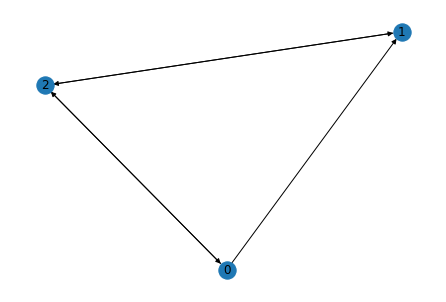

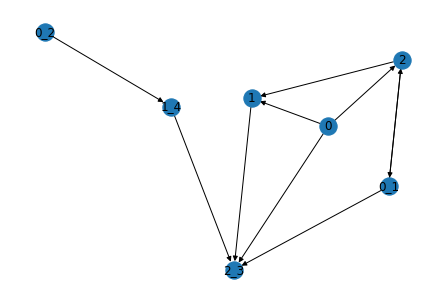

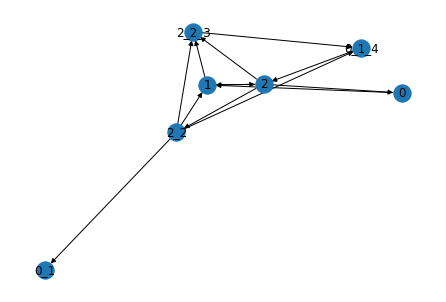

In [30]:
GG1,GG2=gf.network_birth(GG,4,4,0.1,0.6,0)
nx.draw(GG,with_labels=True)
plt.figure()
nx.draw(GG1,with_labels=True)
plt.figure()
nx.draw(GG2,with_labels=True)

In [9]:
import netcomp as nc
import networkx as nx
from Genetc import gene_functions as gf
import copy
from scipy import sparse
G=nx.erdos_renyi_graph(5,0.5,directed=True)
G1=copy.deepcopy(G)
G2=copy.deepcopy(G)
G1=gf.ped_pea_single_lineage(G1,1,0.5,0.6,i)
G1=gf.ped_pea_single_lineage(G1,1,0.5,0.6,i)
for i in range(300):
    G1=gf.ped_pea_single_lineage(G1,1,0.5,0.6,i)
    G2=gf.ped_pea_single_lineage(G2,1,0.5,0.6,i)
    
    A1=nx.to_numpy_matrix(G1)
    A2=nx.to_numpy_matrix(G2)
    A1 = sparse.csr_matrix(A1)
    A2=sparse.csr_matrix(A2)
    print(nc.lambda_dist(A1,A2,kind="laplacian_norm"))
    



0.5127770066194349
0.4882215130092326
0.4499437394940416
0.4683841681952739
0.3679665492684189
0.22324120495666294
0.3451193802279198
0.29134905381551207
0.2920009212801479
0.2946630886940884
0.35446893601034574
0.24871871636813375
0.2483648477592705
0.2644060088745774
0.25191655816225444
0.2909254134225988
0.35669541861714926
0.3385666167168273
0.3579571764292403
0.40961237801062417
0.43697641875063553
0.40650608643797737
0.4272403455190344
0.3756710476939874
0.39654617340774495
0.37559033133918907
0.38761010340507396
0.3386774056438044
0.3161037676406414
0.3462329961308707
0.3545042527231911
0.3599132698255457
0.3535127567791759
0.32856528165622434
0.2901339820073241
0.3102241671940813
0.3719591690926041
0.2774230567642222
0.27688382022591584
0.28084128211932285
0.26300140888199197
0.27533408853694813
0.2728665312779508
0.27351259903080977
0.2826125204619861
0.267238413899331
0.2980869769717115
0.3279315190858971
0.31611312141997955
0.324947581602138
0.3340754626992599
0.354926396281

KeyboardInterrupt: 